In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

# 1. Read Data

In [2]:
df = pd.read_csv('train.csv',index_col='id')#,nrows=100000)

In [3]:
df = df.reset_index(drop=True)

In [4]:
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


# 2. Get Features

## 2.1 Random features

In [5]:
np.random.seed(44)
for i in range(5):
    df['rand'+str(i)]=np.random.rand(len(df))

In [6]:
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,rand0,rand1,rand2,rand3,rand4
0,0,2,2,5,1,0,0,1,0,0,...,1,1,0,0,1,0.834842,0.024312,0.053660,0.699069,0.689051
1,0,1,1,7,0,0,0,0,1,0,...,1,1,0,1,0,0.104796,0.184462,0.567756,0.502276,0.378424
2,0,5,4,9,1,0,0,0,1,0,...,1,1,0,1,0,0.744640,0.794560,0.806805,0.621600,0.448688
3,0,0,1,2,0,0,1,0,0,0,...,0,0,0,0,0,0.360501,0.997569,0.909635,0.104328,0.574226
4,0,0,2,0,1,0,1,0,0,0,...,0,0,1,1,0,0.359311,0.380127,0.078677,0.109429,0.365313


## 2.2 Split feature and target

In [7]:
features = list(df.columns)
target = 'target'
features.remove(target)

In [8]:
X = np.array(df[features])
y = df[target]

# 3. Random Forest

## 3.1 All features

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rfc = RandomForestClassifier(100,n_jobs=-1,class_weight='balanced')

In [11]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

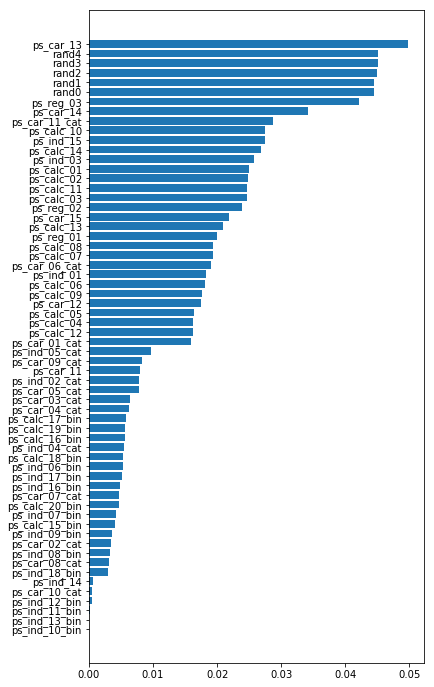

In [12]:
impts = sorted(zip(features,rfc.feature_importances_),key=lambda x: x[-1])

plt.figure(figsize=(6,12))
plt.barh(range(len(impts)),zip(*impts)[1])
plt.yticks(range(len(impts)),zip(*impts)[0])
plt.show()

## 3.2 Less features

In [13]:
nfeatures = []
for f, s in impts:
    if s>=0.01:
        nfeatures.append(f)

In [14]:
X = df[nfeatures]

In [15]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

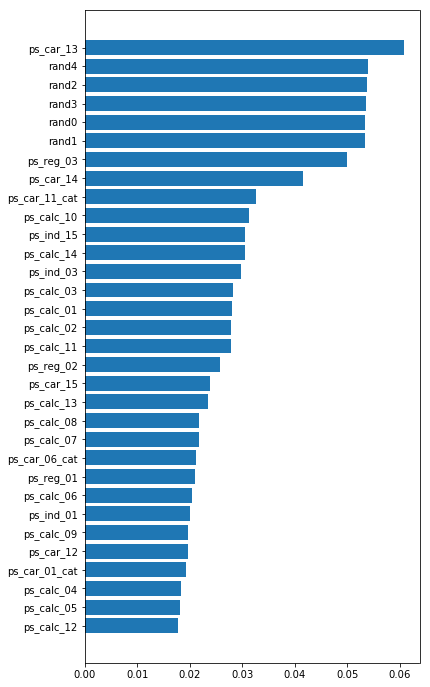

In [16]:
impts = sorted(zip(nfeatures,rfc.feature_importances_),key=lambda x: x[-1])

plt.figure(figsize=(6,12))
plt.barh(range(len(impts)),zip(*impts)[1])
plt.yticks(range(len(impts)),zip(*impts)[0])
plt.show()

## 3.3 New Categorical features

In [17]:
col = 'ps_ind_02_cat'
def CatTransform(col,df):
    tmp = df[[col]].copy()
    tmp['rank'] = 1
    tmp = tmp[[col]].merge(tmp.groupby(col).sum().rank().reset_index(),how='left',on=col)
    return tmp['rank']

In [18]:
for col in df.columns:
    if 'cat' in col:
        df[col] = CatTransform(col,df)

In [19]:
X = np.array(df[features])

In [20]:
rfc = RandomForestClassifier(100,n_jobs=-1,class_weight='balanced')
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

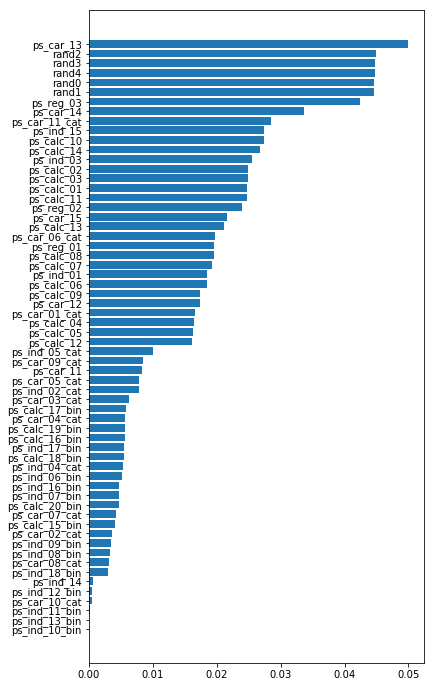

In [21]:
impts = sorted(zip(features,rfc.feature_importances_),key=lambda x: x[-1])

plt.figure(figsize=(6,12))
plt.barh(range(len(impts)),zip(*impts)[1])
plt.yticks(range(len(impts)),zip(*impts)[0])
plt.show()